In [3]:
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy
#from uszipcode import SearchEngine
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy.exc import GeocoderTimedOut

In [59]:
df=pd.read_csv('telco_churn_data.csv')

In [5]:
num_samples,num_features=df.shape
print(f"Number of Features: {num_features}\nNumber of Samples: {num_samples}")

Number of Features: 46
Number of Samples: 7043


In [79]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [80]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


In [81]:
df.dtypes

,0
Customer ID,object
Referred a Friend,object
Number of Referrals,int64
Tenure in Months,int64
Offer,object
Phone Service,object
Avg Monthly Long Distance Charges,float64
Multiple Lines,object
Internet Service,object
Internet Type,object


In [6]:
df.isnull().sum()

,0
Customer ID,0
Referred a Friend,0
Number of Referrals,0
Tenure in Months,0
Offer,3877
Phone Service,0
Avg Monthly Long Distance Charges,0
Multiple Lines,0
Internet Service,0
Internet Type,1526


In [7]:
df.select_dtypes(include='object').nunique()

,0
Customer ID,7043
Referred a Friend,2
Offer,5
Phone Service,2
Multiple Lines,2
Internet Service,2
Internet Type,3
Online Security,2
Online Backup,2
Device Protection Plan,2


In [60]:
df.drop(columns=['Churn Category','Churn Reason','Customer ID','Customer Satisfaction','Offer','City'],inplace=True)
'''
City has a cardinality >1000. Given that our dataset size is a between 7000 and 8000, we would average somewhere around 7 samples per city. Given the high cardinality and low ratio of samples to cardinality, we should drop city
'''

In [9]:
df['Internet Type'].unique()

array(['Fiber Optic', 'Cable', 'DSL', nan], dtype=object)

In [10]:
null_internet_type_df = df[df['Internet Type'].isnull()][['Internet Service']]
print(null_internet_type_df.nunique())
print(len(null_internet_type_df))
#This tells us that the NaN values for internet type relate to people without internet service

Internet Service    1
dtype: int64
1526


In [11]:
df['Internet Type'].fillna('Not Applicable', inplace=True)
df['Internet Type'].unique()

<ipython-input-11-edfa9d15ba67>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Internet Type'].fillna('Not Applicable', inplace=True)


array(['Fiber Optic', 'Cable', 'DSL', 'Not Applicable'], dtype=object)

In [61]:
df.isnull().sum() #No more missing values

,0
Referred a Friend,0
Number of Referrals,0
Tenure in Months,0
Phone Service,0
Avg Monthly Long Distance Charges,0
Multiple Lines,0
Internet Service,0
Internet Type,1526
Avg Monthly GB Download,0
Online Security,0


In [13]:
positive_churn=df['Churn Value'].sum()
negative_churn=len(df['Churn Value'])-positive_churn
print(f'Churn Count: {positive_churn}\nNon-Churn Count: {negative_churn}')
#fairly imbalanced set

Churn Count: 1869
Non-Churn Count: 5174


In [62]:
'''
We are identifying columns with only two unique values and then printing said values so we can map to 1,0 if needed
'''
binary_cols = df.select_dtypes(include='object').nunique()
binary_cols = binary_cols[binary_cols == 2].index

for col in binary_cols:
    print(f"Column: {col}",df[col].unique())
#map yes/no and male/female to 1 and 0 respectively

Column: Referred a Friend ['No' 'Yes']
Column: Phone Service ['No' 'Yes']
Column: Multiple Lines ['No' 'Yes']
Column: Internet Service ['Yes' 'No']
Column: Online Security ['No' 'Yes']
Column: Online Backup ['No' 'Yes']
Column: Device Protection Plan ['Yes' 'No']
Column: Premium Tech Support ['No' 'Yes']
Column: Streaming TV ['No' 'Yes']
Column: Streaming Movies ['Yes' 'No']
Column: Streaming Music ['No' 'Yes']
Column: Unlimited Data ['No' 'Yes']
Column: Paperless Billing ['Yes' 'No']
Column: Gender ['Male' 'Female']
Column: Under 30 ['No' 'Yes']
Column: Senior Citizen ['Yes' 'No']
Column: Married ['No' 'Yes']
Column: Dependents ['No' 'Yes']


In [63]:
for col in binary_cols:
    df[col].replace({'Yes':1,'No':0},inplace=True)
df["Gender"].replace({'Female':0,'Male':1},inplace=True)

<ipython-input-63-58f5f66d383b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({'Yes':1,'No':0},inplace=True)
<ipython-input-63-58f5f66d383b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].replace({'Yes':1,'No':0},inplace=True)
<ipython-input-63-58f5f66d383b>:3: FutureWar

In [64]:
#verify
for col in binary_cols:
    print(f"Column: {col}",df[col].unique())

Column: Referred a Friend [0 1]
Column: Phone Service [0 1]
Column: Multiple Lines [0 1]
Column: Internet Service [1 0]
Column: Online Security [0 1]
Column: Online Backup [0 1]
Column: Device Protection Plan [1 0]
Column: Premium Tech Support [0 1]
Column: Streaming TV [0 1]
Column: Streaming Movies [1 0]
Column: Streaming Music [0 1]
Column: Unlimited Data [0 1]
Column: Paperless Billing [1 0]
Column: Gender [1 0]
Column: Under 30 [0 1]
Column: Senior Citizen [1 0]
Column: Married [0 1]
Column: Dependents [0 1]


In [17]:
'''
uszipcode package is having errors - attempting to use long/latt with geopy instead of zipcode
https://www.geeksforgeeks.org/get-the-city-state-and-country-names-from-latitude-and-longitude-using-python/
'''
#Running a test:
geolocator= Nominatim(user_agent="my_geopy_app")
location= geolocator.reverse(str(df['Latitude'][0])+","+str(df['Longitude'][0]))
print(location.address)
address= location.raw['address']
print(address)
#Lets try to take the suburb and county

582, South Atlantic Boulevard, Eastmont, East Los Angeles, Los Angeles County, California, 90022, United States
{'house_number': '582', 'road': 'South Atlantic Boulevard', 'hamlet': 'Eastmont', 'suburb': 'East Los Angeles', 'county': 'Los Angeles County', 'state': 'California', 'ISO3166-2-lvl4': 'US-CA', 'postcode': '90022', 'country': 'United States', 'country_code': 'us'}


In [ ]:
'''
#Leaving as sample - as suspected we are likely restricted by the number of queries we can send as free users
geolocator = Nominatim(user_agent="my_geopy_app") #initialized user agent
#Apply a function that effectively utilizes our above test approach via geopy to our dataframe
#Implementing a lambda function on the dataframe

def get_loccyloc(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True)
        if location:
            address= location.raw.get('address')
            suburb=  address.get('suburb')
            county= address.get('county')
            #get back a series
            return pd.Series([suburb, county])
        else:
            print("location not found")
            return pd.Series([None, None])#flag for error
    except:
        print("Error getting location - likely timeout")
df[['Suburb','County']] = df.apply(lambda row: get_loccyloc(row['Latitude'], row['Longitude']), axis=1)

print(df[['Latitude','Longitude', 'Suburb','County']].head())

'''


Error getting location - likely timeout


Error getting location - likely timeout
Error getting location - likely timeout


Error getting location - likely timeout


In [1]:
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.5 MB/s eta 0:00:00


In [9]:
!pip uninstall -y sqlalchemy-mate uszipcode
!pip install sqlalchemy-mate==1.4.28.4 uszipcode #I lowkey guessed a version lmao crossing fingers

  Using cached uszipcode-1.0.1-py2.py3-none-any.whl.metadata (8.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 2.2 MB/s eta 0:00:00
Using cached uszipcode-1.0.1-py2.py3-none-any.whl (35 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.6 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.38
    Uninstalling SQLAlchemy-2.0.38:
      Successfully uninstalled SQLAlchemy-2.0.38
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.54 which is incompatible.


In [2]:
from uszipcode import SearchEngine


In [65]:
search = SearchEngine()
def get_county_by_zip(zip_code):
    result = search.by_zipcode(zip_code)
    return result.county if result else None
df['County']=df['Zip Code'].apply(get_county_by_zip)
print(df['County'].nunique()) #58 unique counties - reasonable for 7000+ samples

Exception ignored in: <function SearchEngine.__del__ at 0x785533382340>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/uszipcode/search.py", line 196, in __del__
  File "/usr/local/lib/python3.11/dist-packages/uszipcode/search.py", line 202, in close
  File "/usr/local/lib/python3.11/dist-packages/sqlalchemy/orm/session.py", line 1816, in close
  File "/usr/local/lib/python3.11/dist-packages/sqlalchemy/orm/session.py", line 1858, in _close_impl
  File "/usr/local/lib/python3.11/dist-packages/sqlalchemy/orm/session.py", line 926, in close
  File "/usr/local/lib/python3.11/dist-packages/sqlalchemy/engine/base.py", line 2426, in close
  File "/usr/local/lib/python3.11/dist-packages/sqlalchemy/engine/base.py", line 2649, in _do_close
  File "/usr/local/lib/python3.11/dist-packages/sqlalchemy/engine/base.py", line 2635, in _close_impl
  File "/usr/local/lib/python3.11/dist-packages/sqlalchemy/engine/base.py", line 2627, in _connection_rollback_impl
  File

58


In [69]:
df['County'].unique()

array(['Los Angeles County', 'Orange County', 'San Bernardino County',
       'San Diego County', 'Riverside County', 'Santa Barbara County',
       'Tulare County', 'Kern County', 'Fresno County', 'Monterey County',
       'San Francisco County', 'Santa Clara County', 'Solano County',
       'Contra Costa County', 'Alameda County', 'Napa County',
       'Marin County', 'Santa Cruz County', 'Calaveras County',
       'Tuolumne County', 'Sonoma County', 'Lake County',
       'Humboldt County', 'Yolo County', 'Sacramento County',
       'Sutter County', 'Placer County', 'Yuba County', 'Plumas County',
       'Butte County', 'Nevada County', 'Trinity County', 'Shasta County',
       'Ventura County', 'San Luis Obispo County', 'Mono County',
       'Merced County', 'San Mateo County', 'San Joaquin County',
       'Mariposa County', 'Stanislaus County', 'Mendocino County',
       'Del Norte County', 'Glenn County', 'Modoc County',
       'Tehama County', 'Lassen County', 'Sierra County',
  

In [67]:
df.drop(columns=["Zip Code","Longitude", "Latitude"],inplace=True)

In [70]:
df.dtypes

,0
Referred a Friend,int64
Number of Referrals,int64
Tenure in Months,int64
Phone Service,int64
Avg Monthly Long Distance Charges,float64
Multiple Lines,int64
Internet Service,int64
Internet Type,object
Avg Monthly GB Download,int64
Online Security,int64


In [71]:
df.nunique()

,0
Referred a Friend,2
Number of Referrals,12
Tenure in Months,72
Phone Service,2
Avg Monthly Long Distance Charges,3584
Multiple Lines,2
Internet Service,2
Internet Type,3
Avg Monthly GB Download,63
Online Security,2


In [72]:
continuous_variables = ["Number of Referrals","Tenure in Months","Avg Monthly Long Distance Charges","Avg Monthly GB Download","Monthly Charge","Total Regular Charges","Total Refunds","Total Extra Data Charges","Total Long Distance Charges","Age","Population","CLTV","Total Customer Svc Requests","Product/Service Issues Reported","Number of Dependents"]
categorical_variables = ["Referred a Friend","Phone Service","Multiple Lines","Internet Service","Internet Type","Online Security","Online Backup","Device Protection Plan","Premium Tech Support","Streaming TV","Streaming Movies","Streaming Music","Unlimited Data","Contract","Paperless Billing","Payment Method","Gender","Under 30","Senior Citizen","Married","Dependents","Churn Value","County"] #removed city

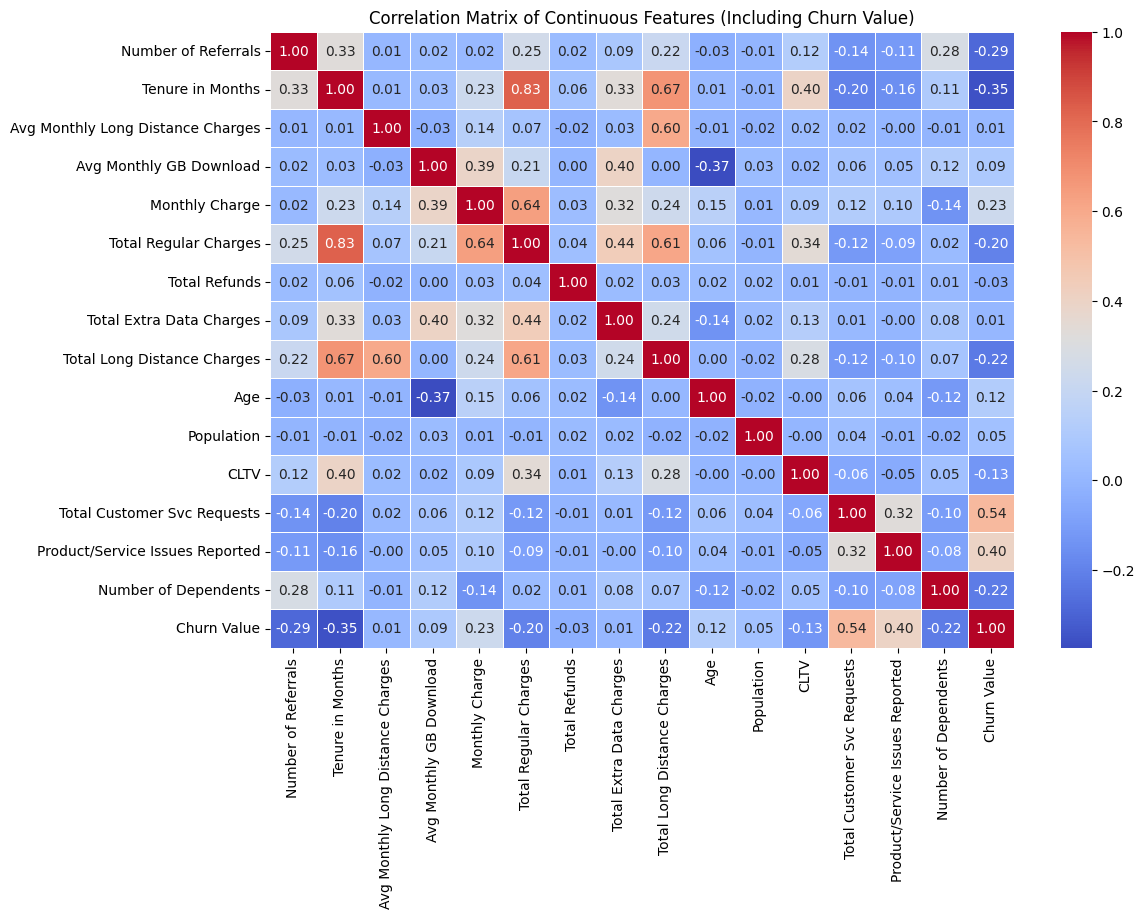

In [73]:
#Computing correlation matrix for continous variables and the binary churn value (target)
corr_matrix = df[continuous_variables + ["Churn Value"]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Continuous Features (Including Churn Value)")
plt.show()
#Should include some of the binary categorical features?

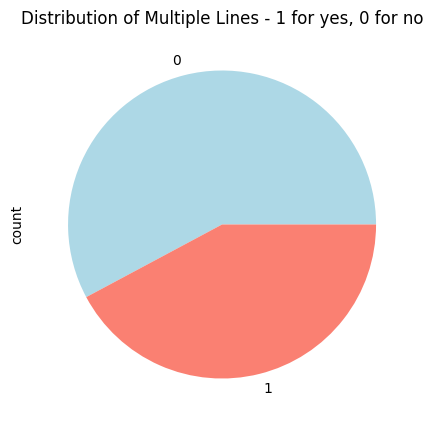

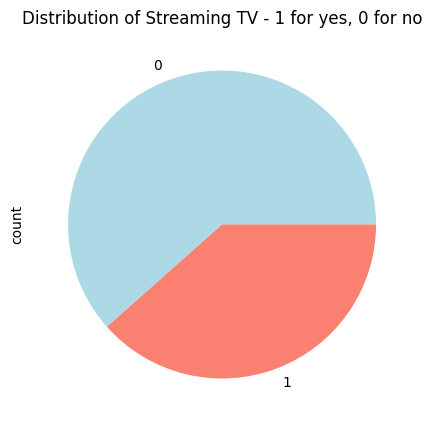

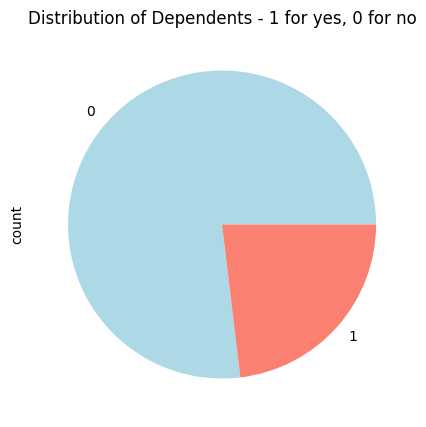

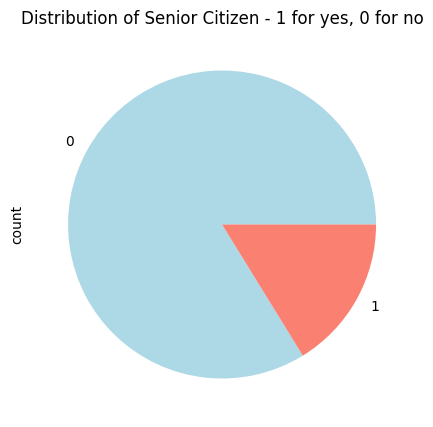

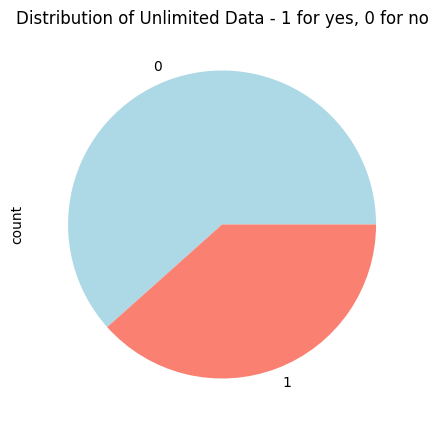

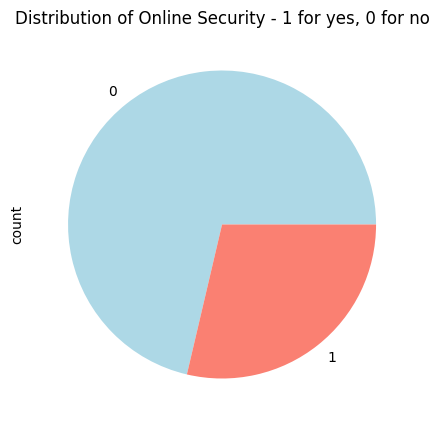

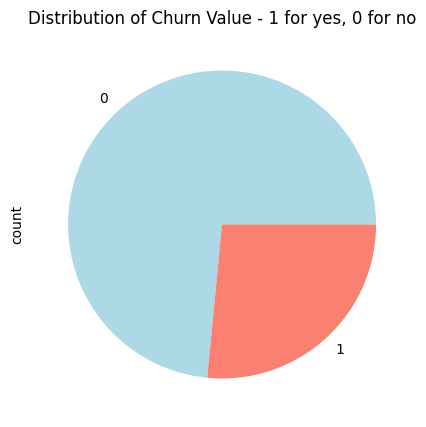

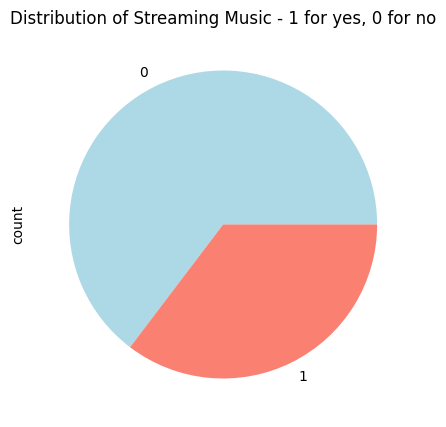

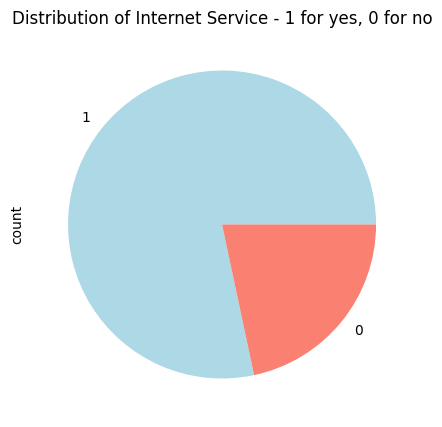

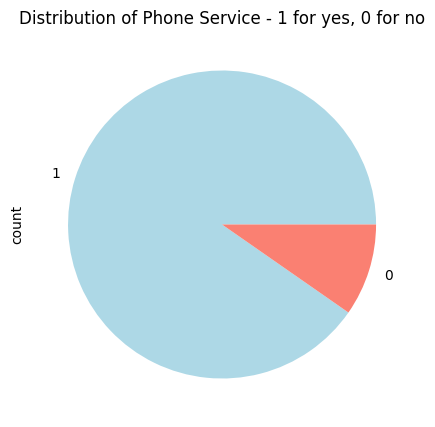

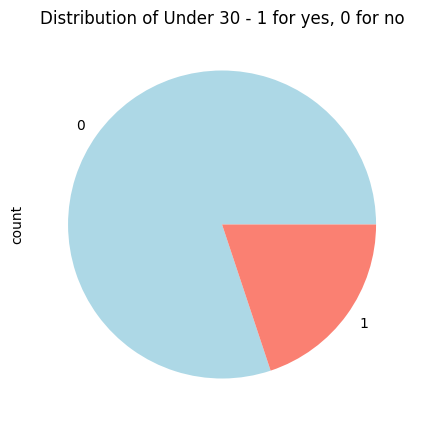

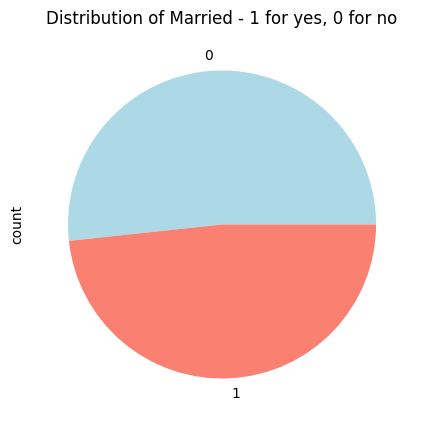

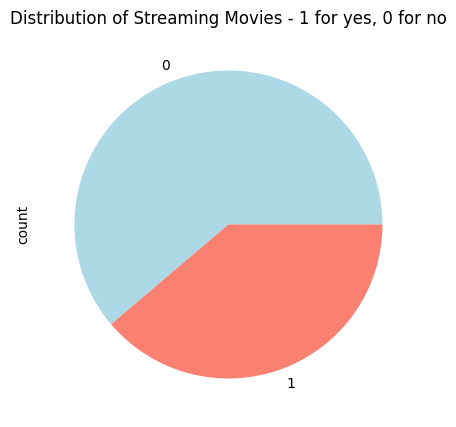

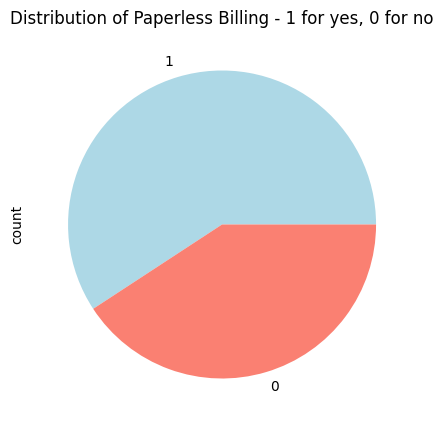

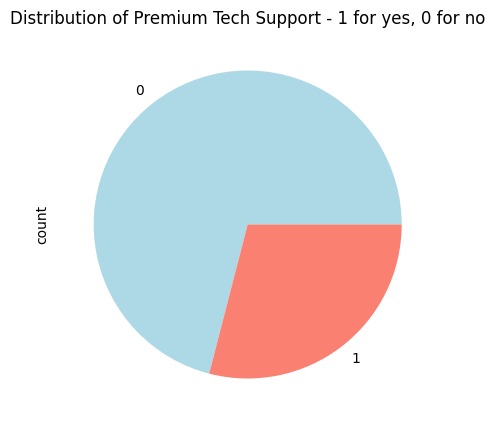

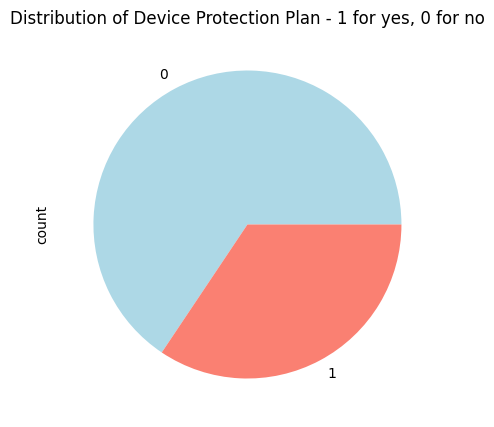

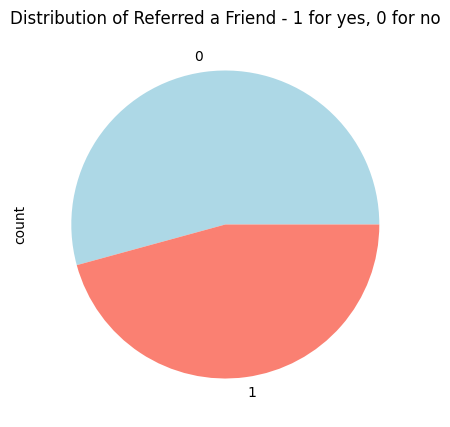

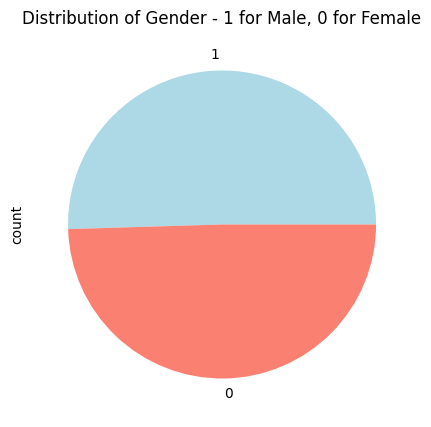

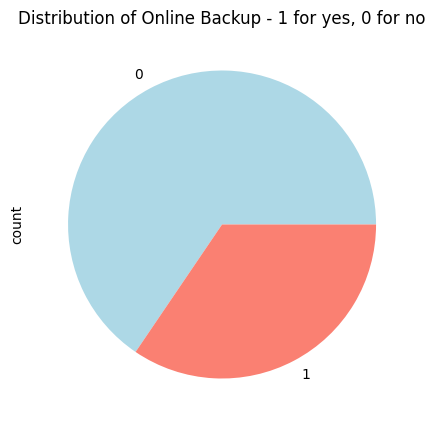

In [43]:
bf=binary_cols.copy()
bf=list(bf)
bf.append("Churn Value")
bf.append("Gender")
bf=set(bf)#lazy coding, don't worry about it
#pie plots for each of the target features
for feature in bf:
    plt.figure(figsize=(5, 5))
    df[feature].value_counts().plot.pie(colors=["lightblue", "salmon"])
    if feature!="Gender":
        plt.title(f"Distribution of {feature} - 1 for yes, 0 for no")
    else:
        plt.title(f"Distribution of {feature} - 1 for Male, 0 for Female")

    plt.show()


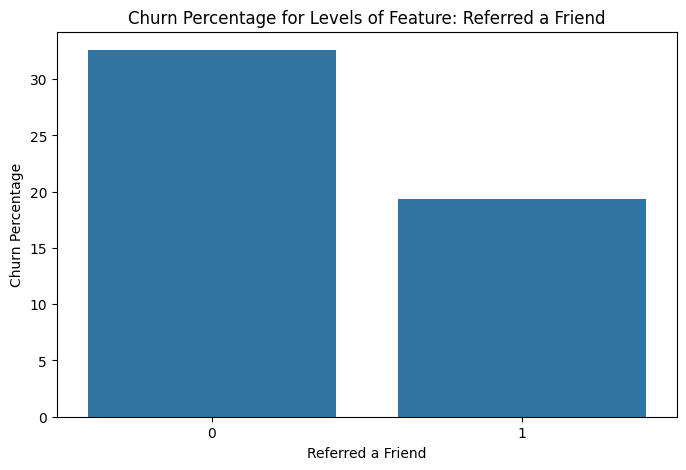

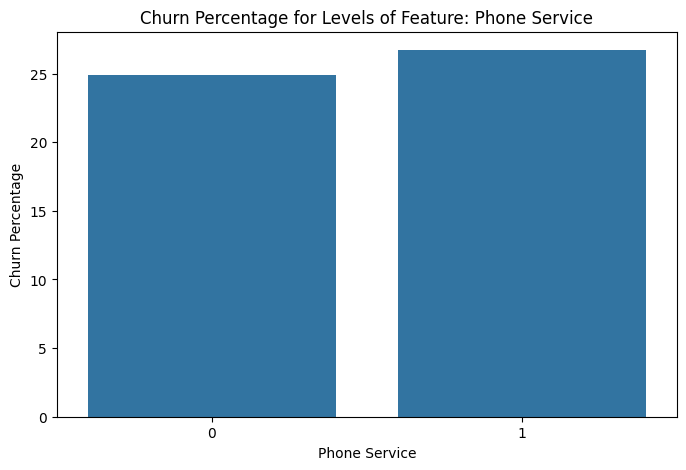

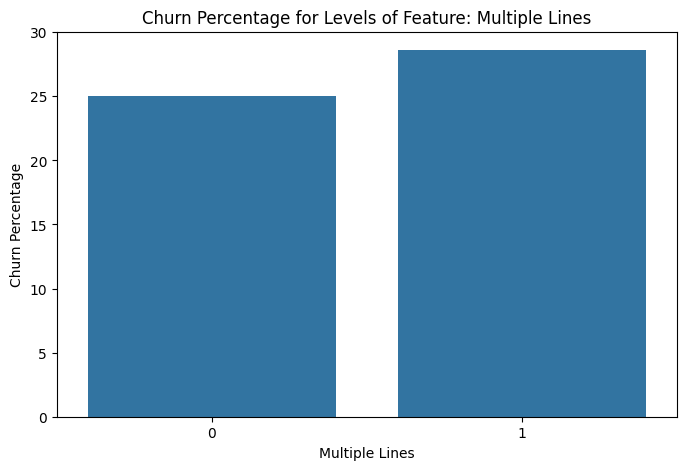

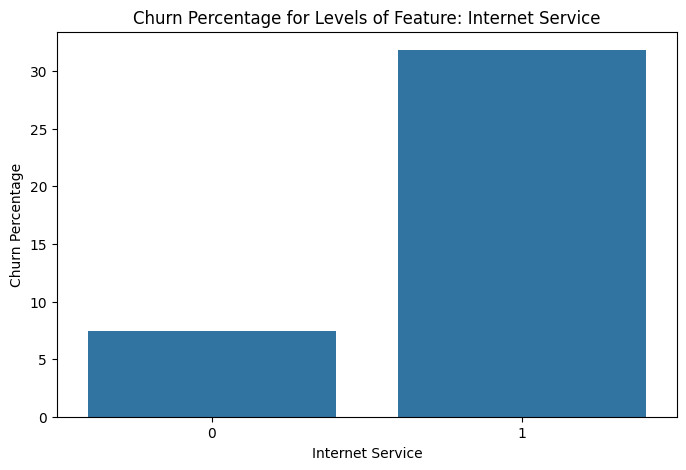

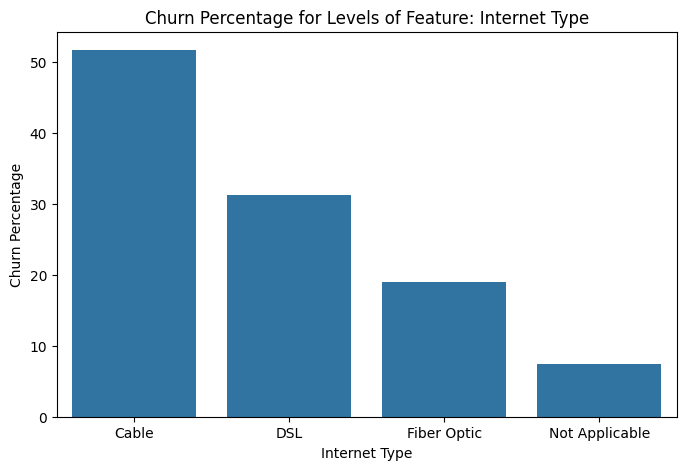

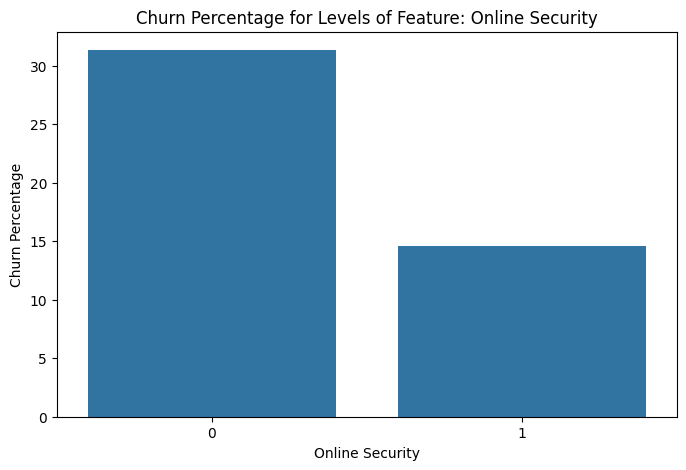

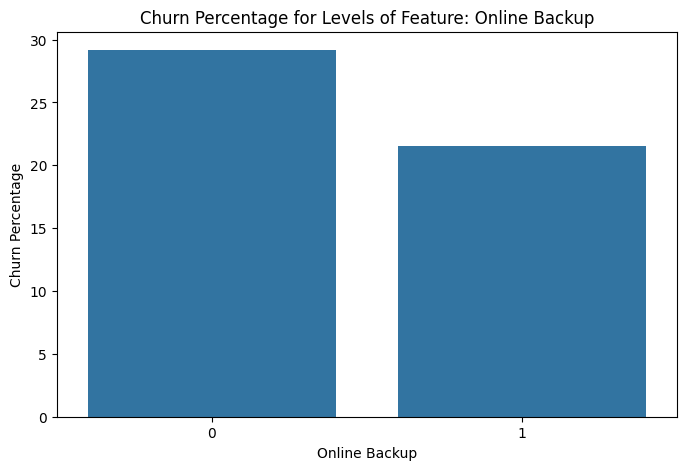

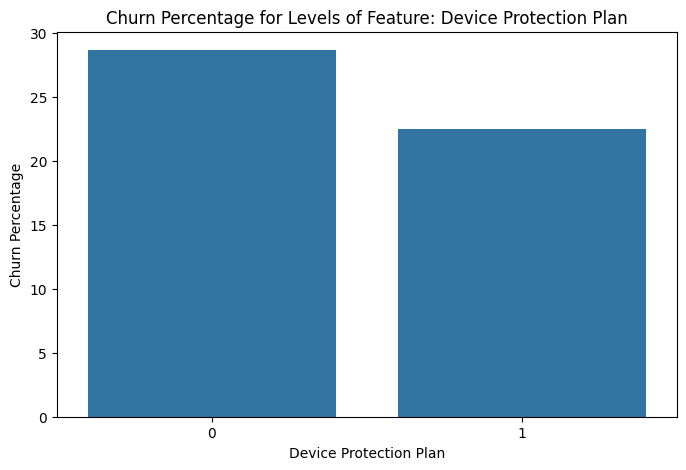

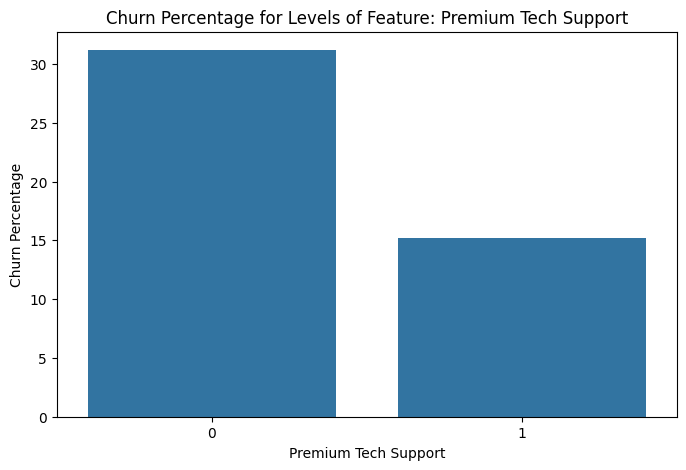

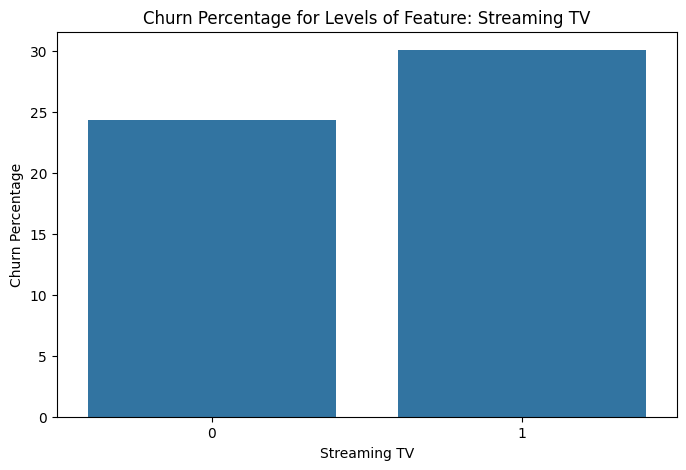

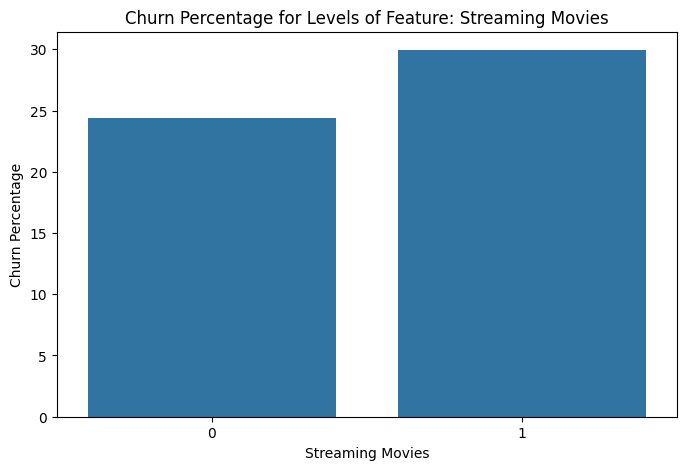

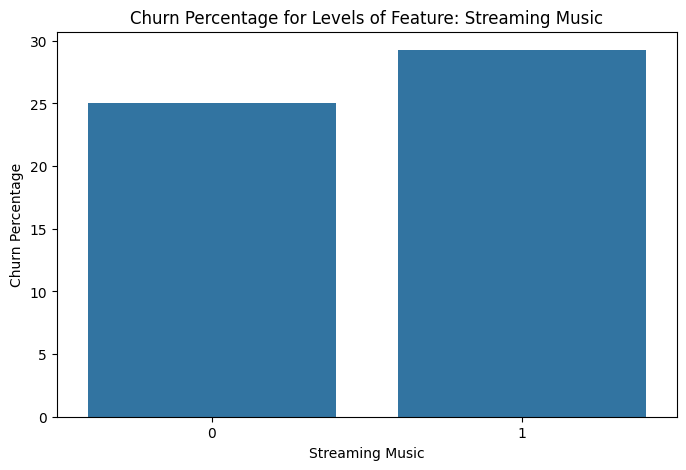

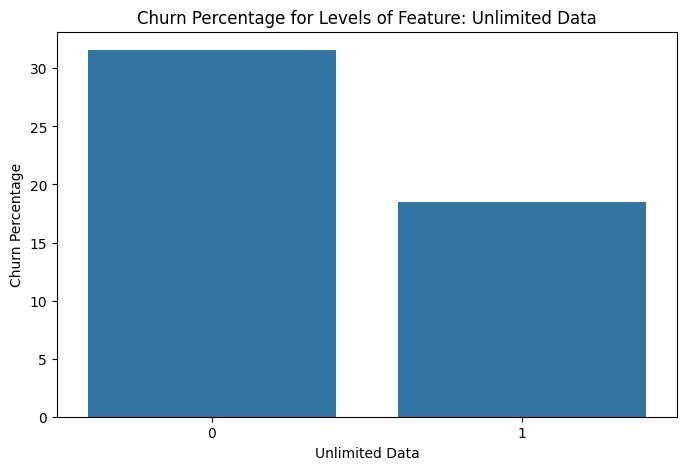

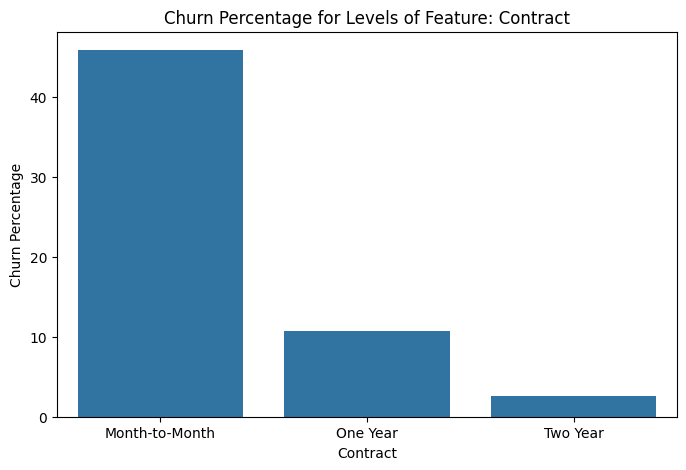

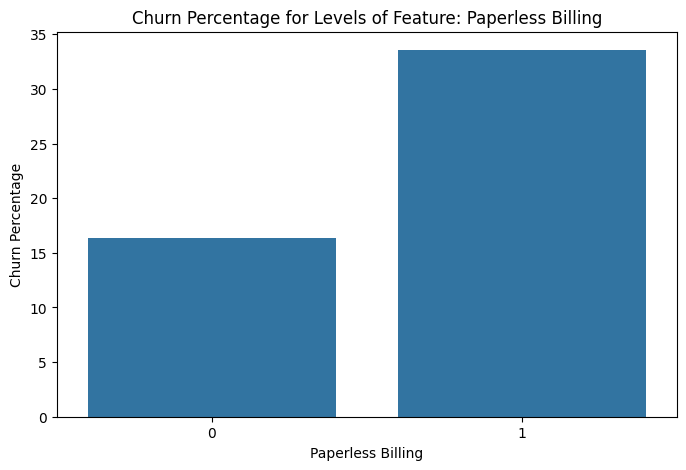

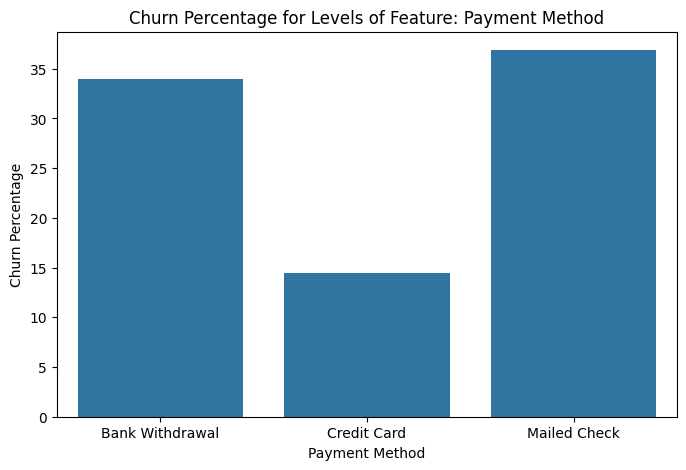

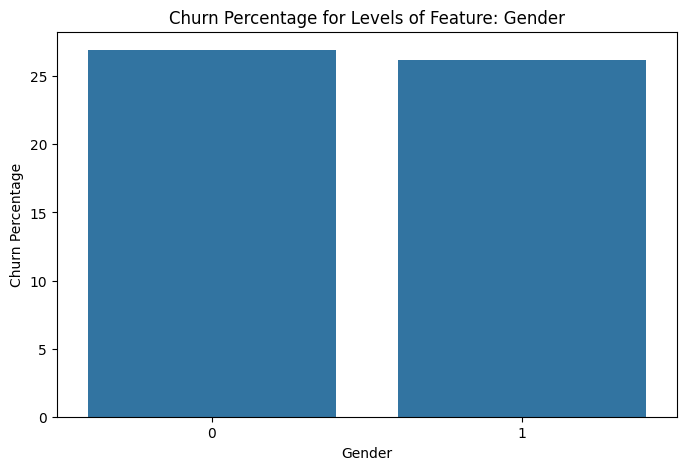

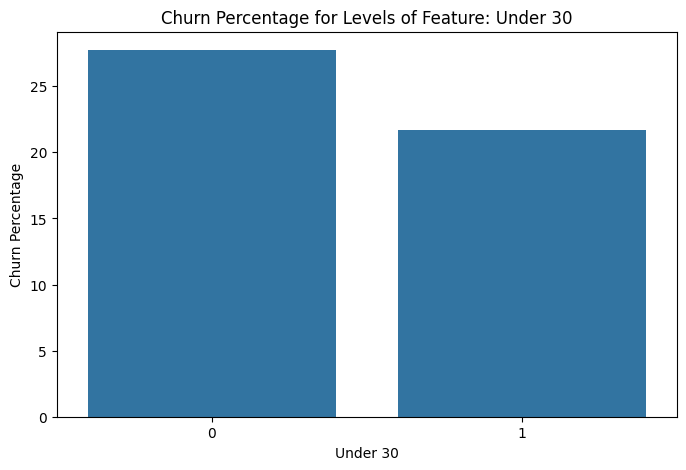

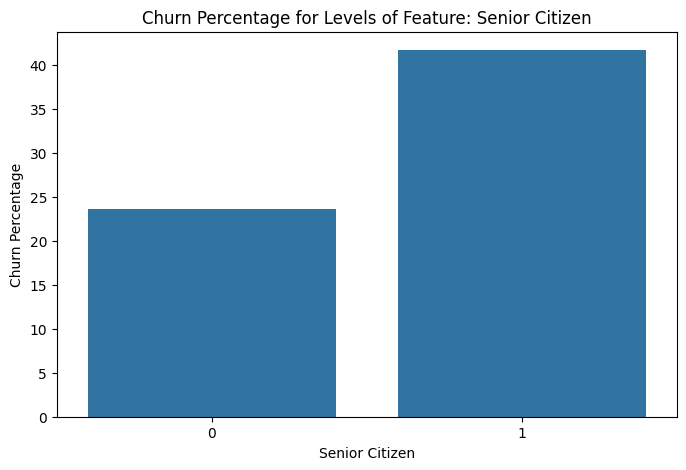

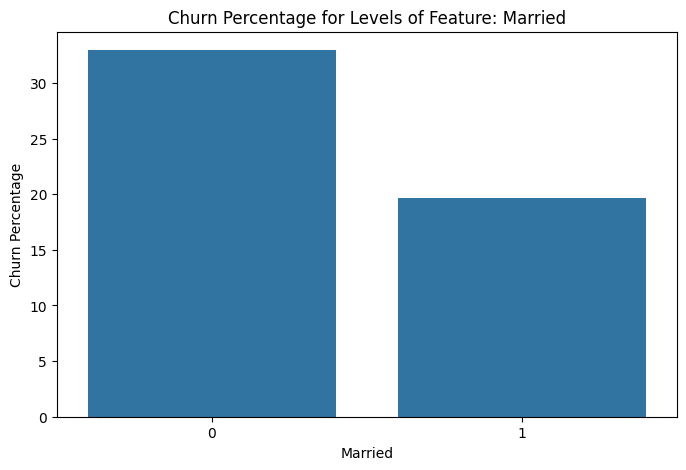

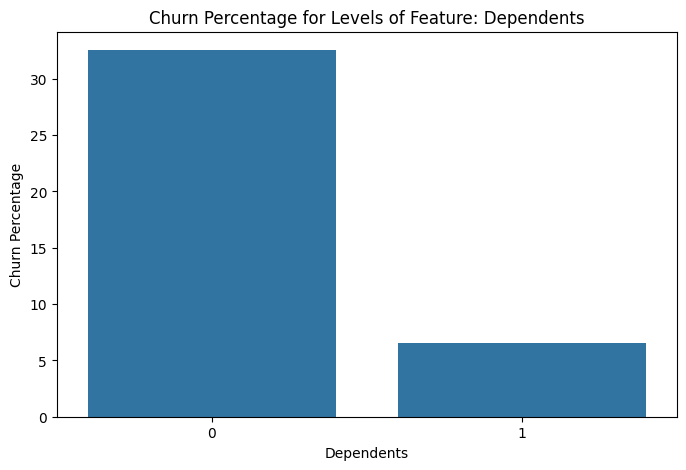

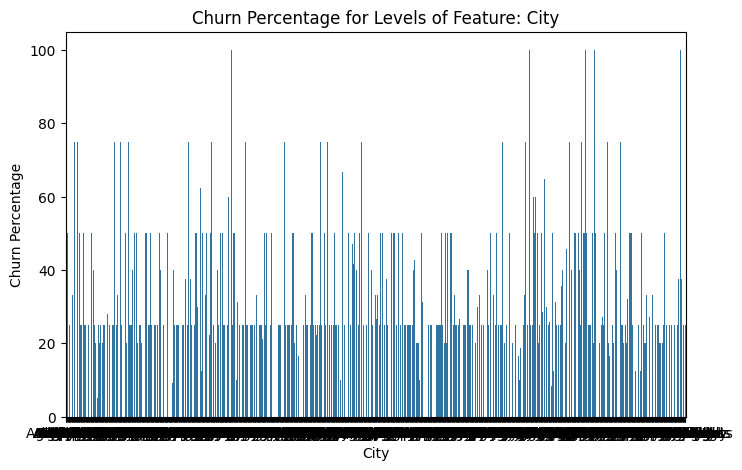

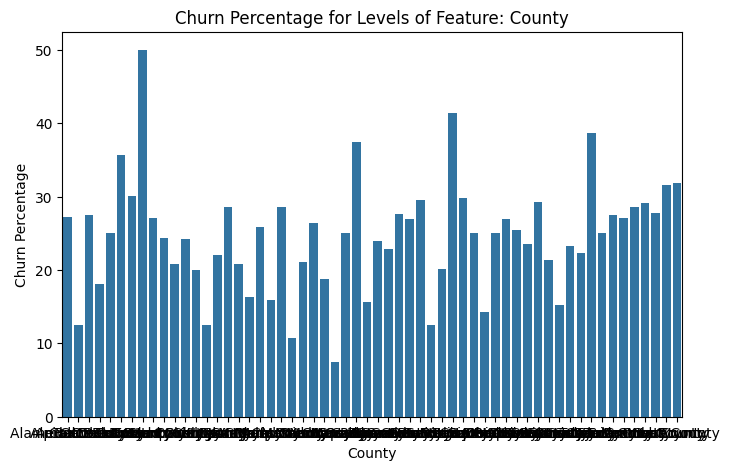

In [46]:
for feature in categorical_variables:
    if feature != "Churn Value":#exclude the target variable
        plt.figure(figsize=(8, 5))
        #compute percentage churn (easier to visualize differences than frequencies)
        percent_churn = df.groupby(feature)["Churn Value"].mean() * 100  #Convert to percentage

        sns.barplot(x=percent_churn.index, y=percent_churn.values)
        plt.title(f"Churn Percentage for Levels of Feature: {feature}")
        plt.xlabel(feature)
        plt.ylabel("Churn Percentage")
        plt.show()


#Lots of good insights to talk about in these plots
'''
Surface level interpretations:
- People without dependents churn at 5X more than those with
- Certain cities and counties have residents more likely to churn (reflections of the local demographics - ex: people that are older and more likely to opt for paper billing, or those less likely to shop for deals, etc)
- blah blah blah blah blah blah write the crap for a slide later
'''

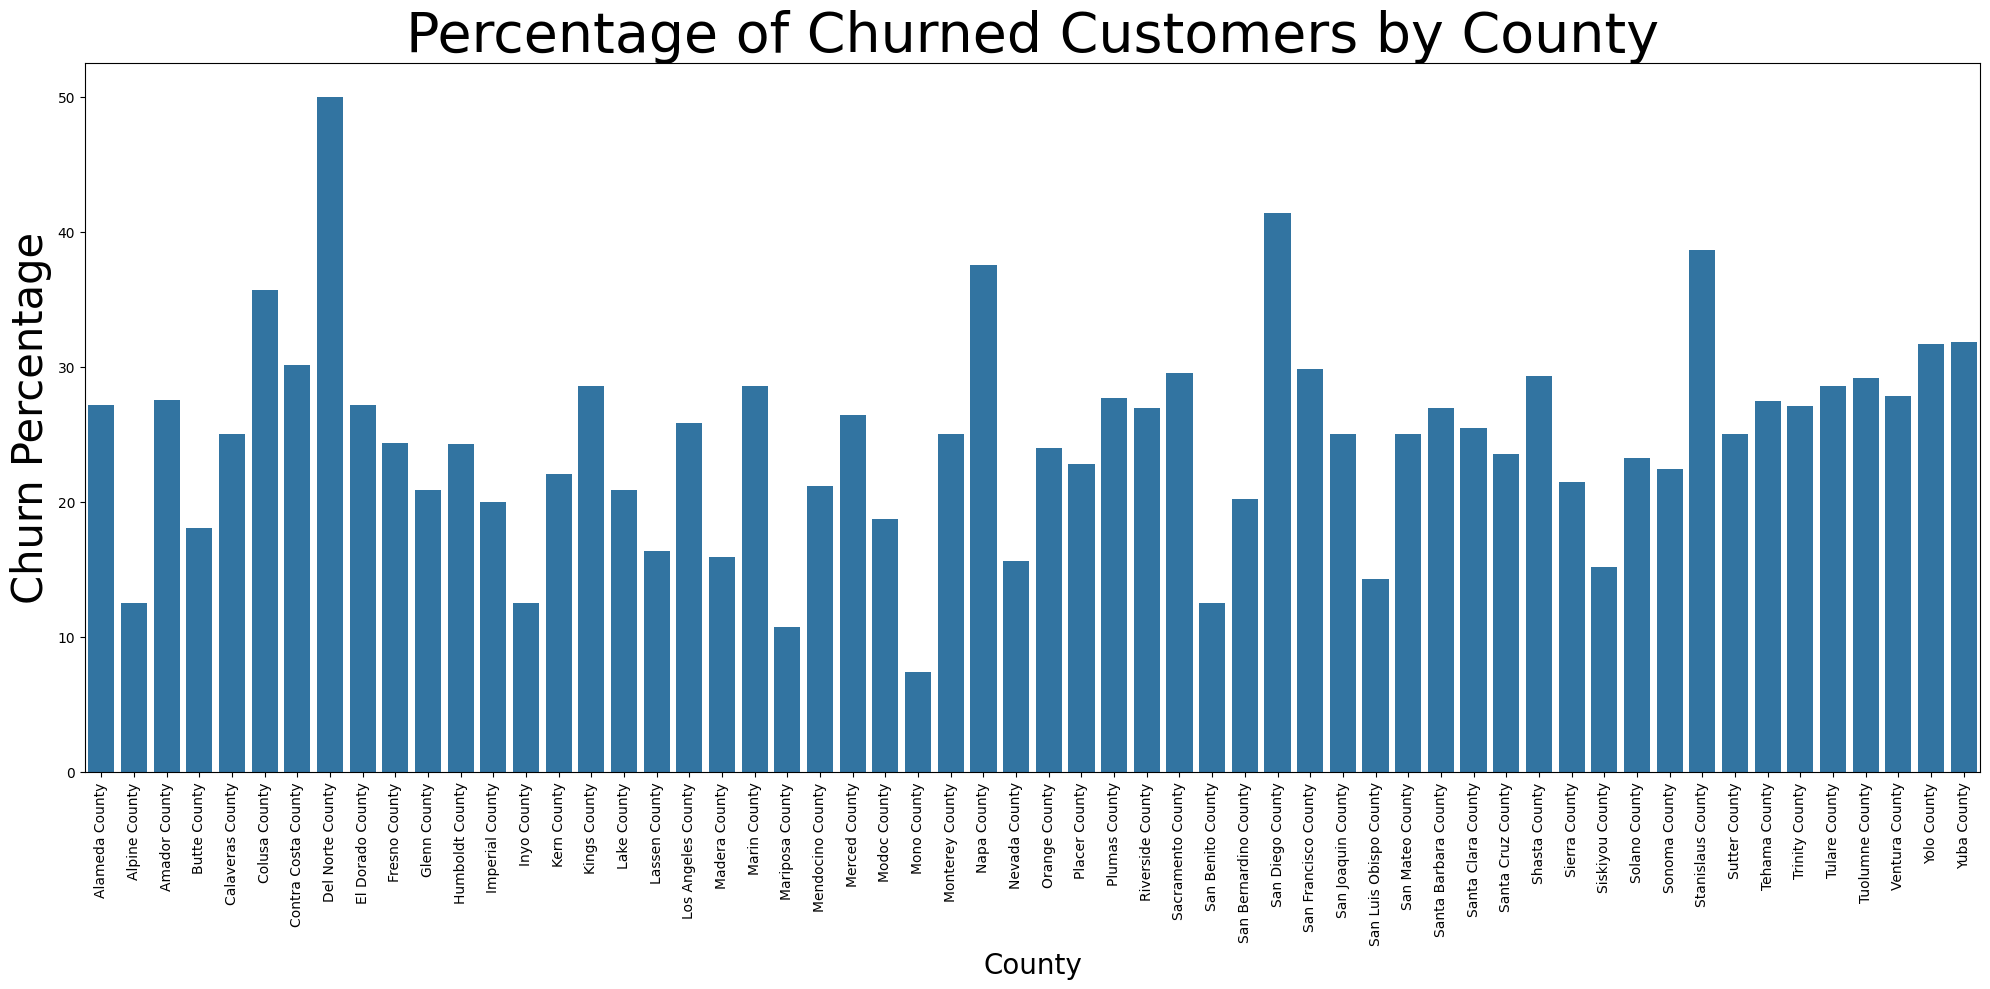

In [53]:
#Note: Utilized chatgpt to debug plot to save time for this particular plot's representation issue

county_churn_distribution = df.groupby(['County', 'Churn Value']).size().unstack(fill_value=0)
#Percentages for plotting churned/total*100
county_churn_distribution['Churn Percentage'] = (county_churn_distribution[1]/(county_churn_distribution[0] + county_churn_distribution[1])) * 100
county_churn_distribution.reset_index(inplace=True)
plt.figure(figsize=(20, 10))
sns.barplot(x='County', y='Churn Percentage', data=county_churn_distribution)
plt.title('Percentage of Churned Customers by County',fontsize=40)
plt.xlabel('County',fontsize=20)
plt.ylabel('Churn Percentage',fontsize=30)
plt.xticks(rotation=90) #Better readability
plt.tight_layout()
plt.show()

#This data might lend itself better to a tree for ML

In [75]:
#One-hot encoding high cardinality categorical features (n>=3)
high_cardinality_categoricals = ["Internet Type","Contract","Payment Method","County"]
df_encoded = pd.get_dummies(df, columns=high_cardinality_categoricals, drop_first=True)
df_encoded.head() #verify


,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,County_Sonoma County,County_Stanislaus County,County_Sutter County,County_Tehama County,County_Trinity County,County_Tulare County,County_Tuolumne County,County_Ventura County,County_Yolo County,County_Yuba County
0,0,0,1,0,0.00,0,1,9,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,8,1,48.85,1,1,19,0,1,...,False,False,False,False,False,False,False,False,False,False
2,0,0,18,1,11.33,1,1,57,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1,1,25,1,19.76,0,1,13,0,1,...,False,False,False,False,False,False,False,False,False,False
4,1,1,37,1,6.33,1,1,15,0,0,...,False,False,False,False,False,False,False,False,False,False


In [76]:
df_encoded.shape

(7043, 97)

In [78]:
#applymap to convert booleans to 1/0 (for our dummy variables)
df_encoded= df_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


<ipython-input-78-5371f63462bc>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded= df_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [79]:
df_encoded.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,County_Sonoma County,County_Stanislaus County,County_Sutter County,County_Tehama County,County_Trinity County,County_Tulare County,County_Tuolumne County,County_Ventura County,County_Yolo County,County_Yuba County
0,0,0,1,0,0.00,0,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,8,1,48.85,1,1,19,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,18,1,11.33,1,1,57,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,25,1,19.76,0,1,13,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,37,1,6.33,1,1,15,0,0,...,0,0,0,0,0,0,0,0,0,0


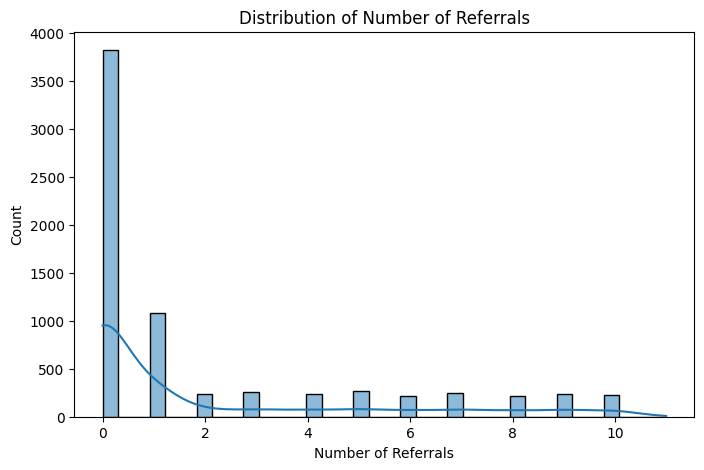

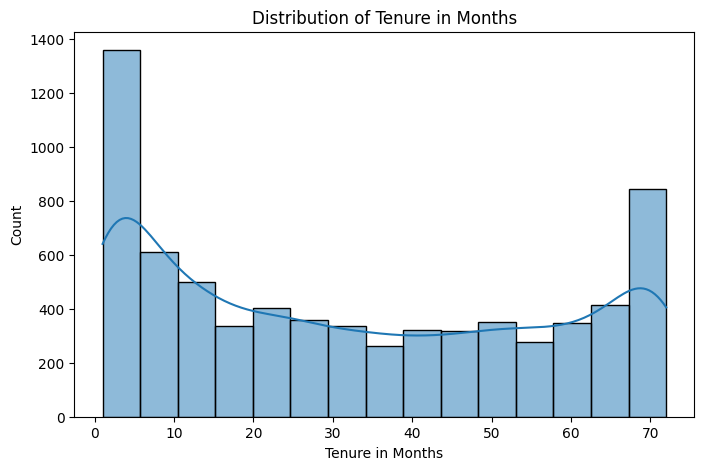

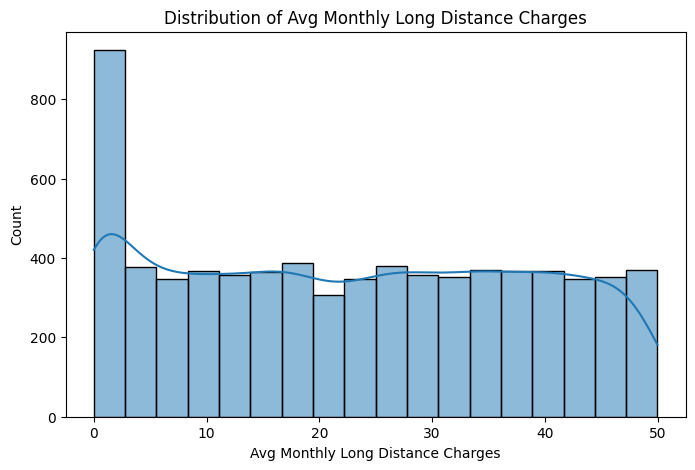

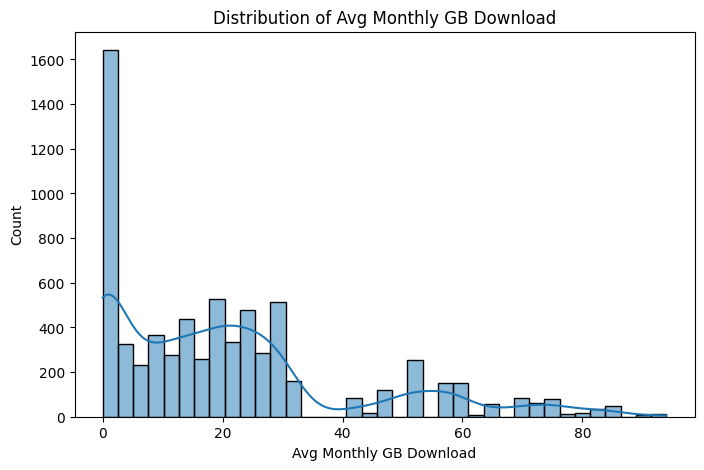

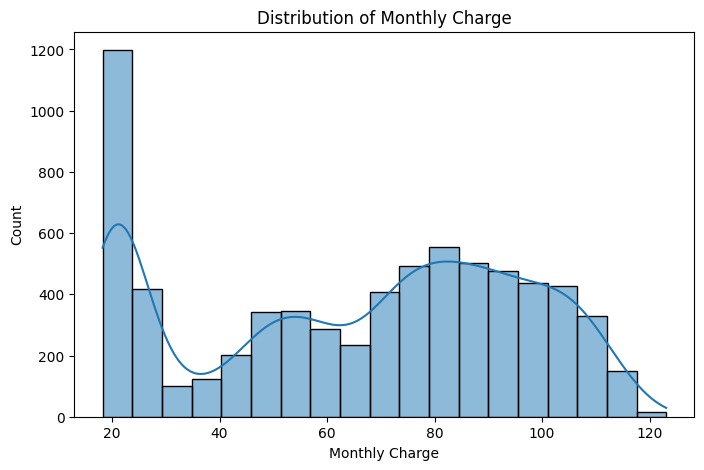

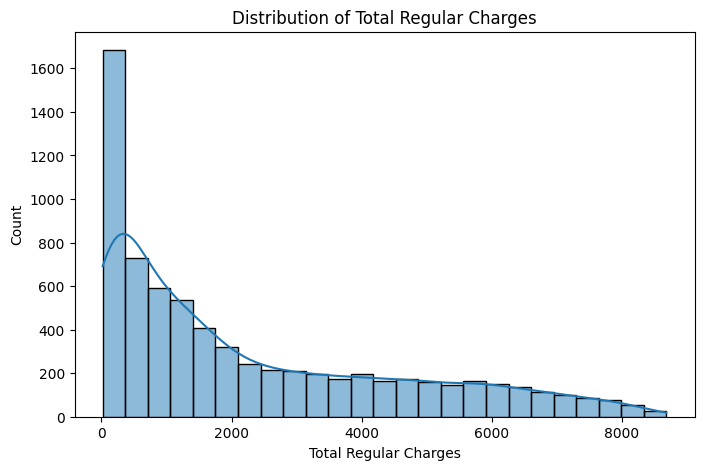

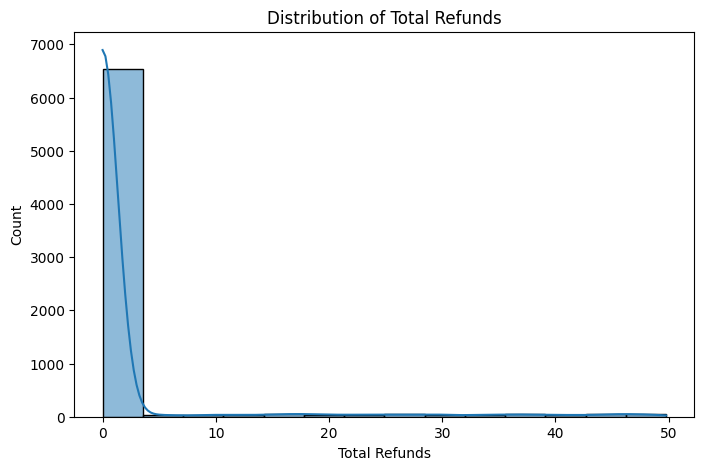

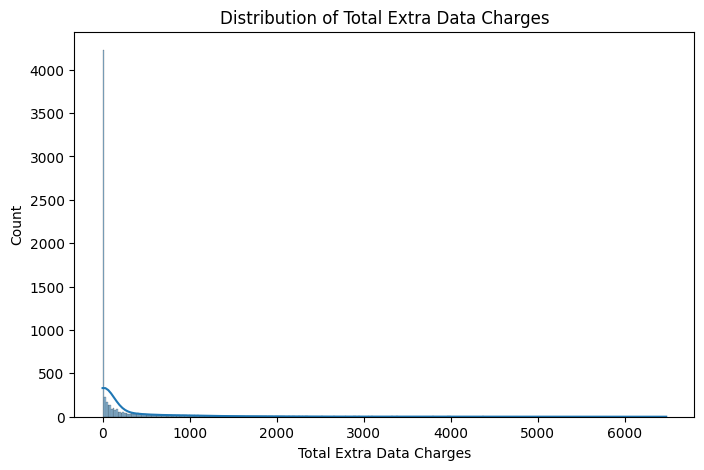

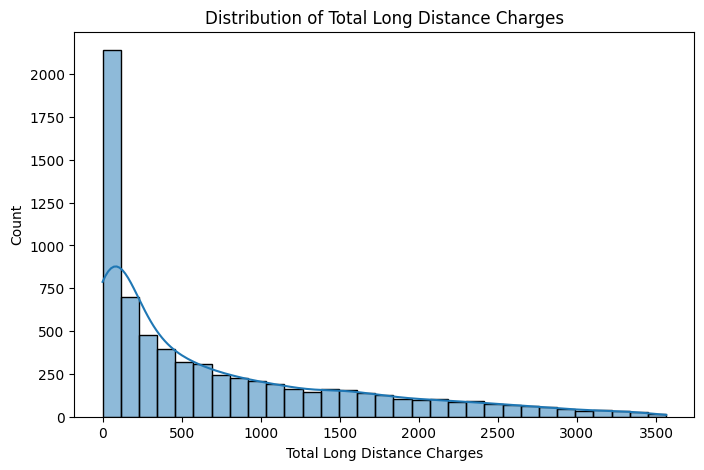

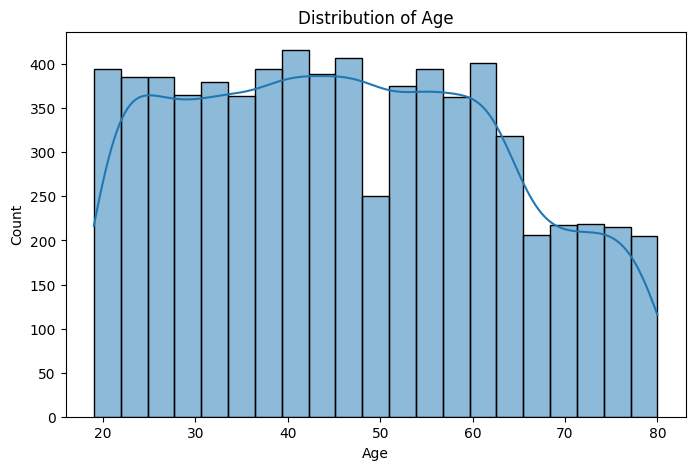

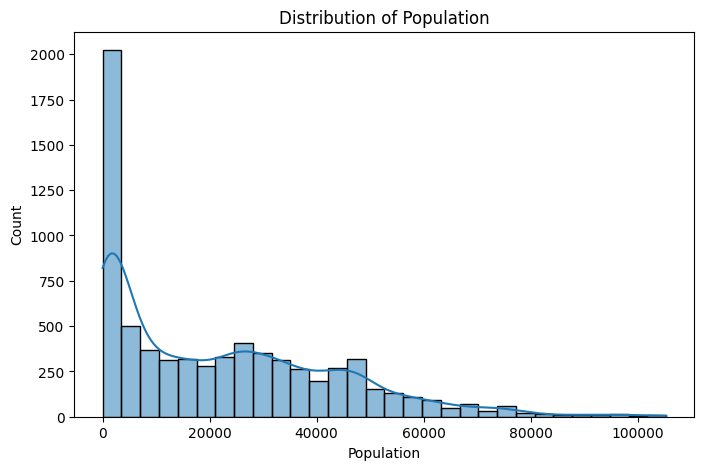

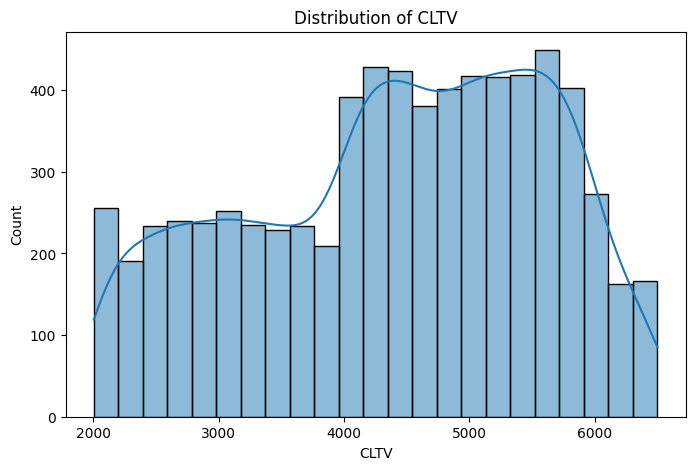

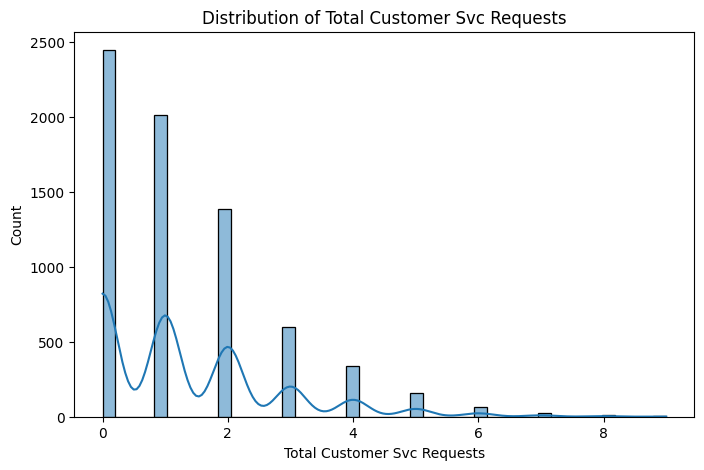

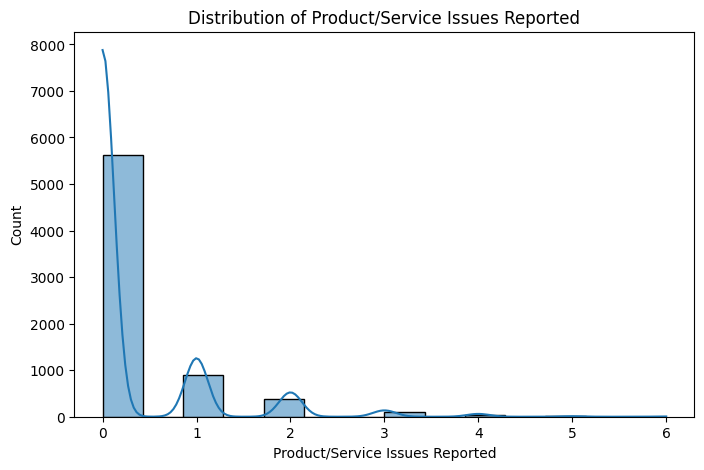

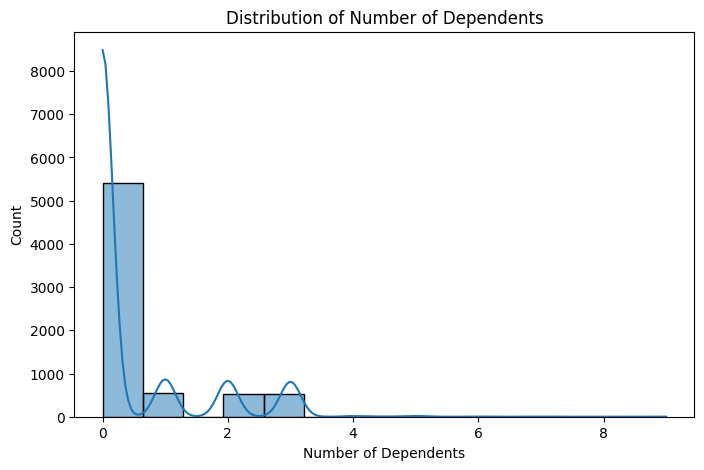

In [81]:
#plotting the continous features to take a look
for feature in continuous_variables:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_encoded, x=feature, kde=True)
    plt.title(f"Distribution of {feature}")

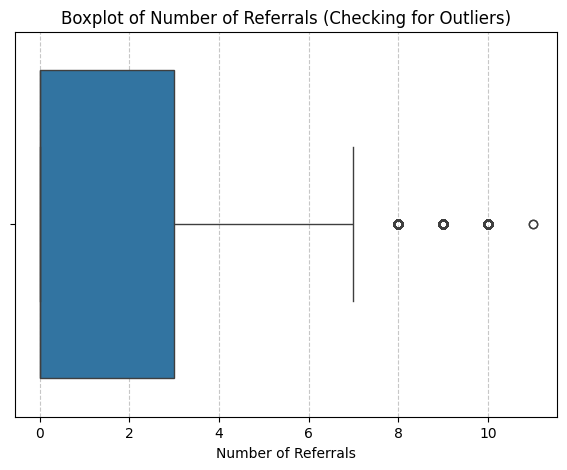

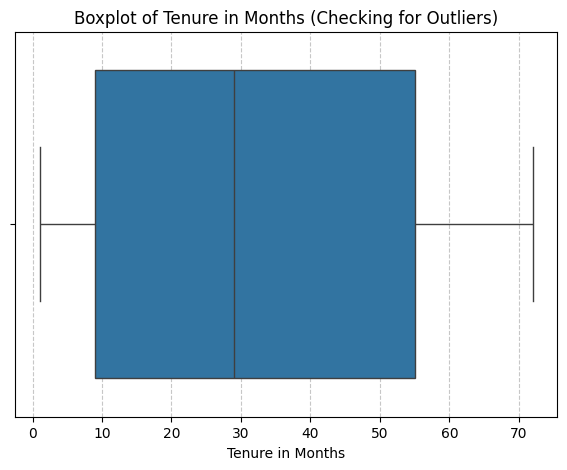

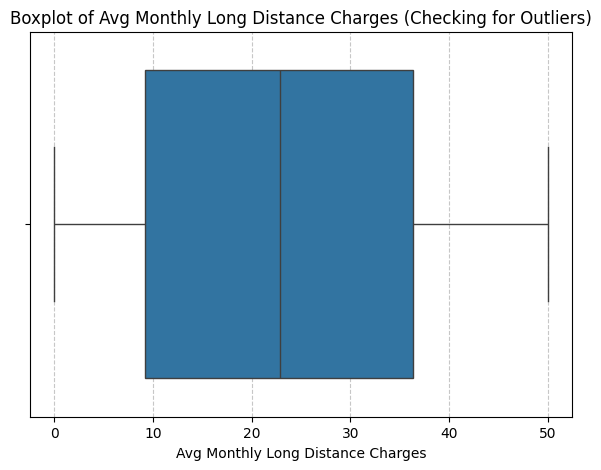

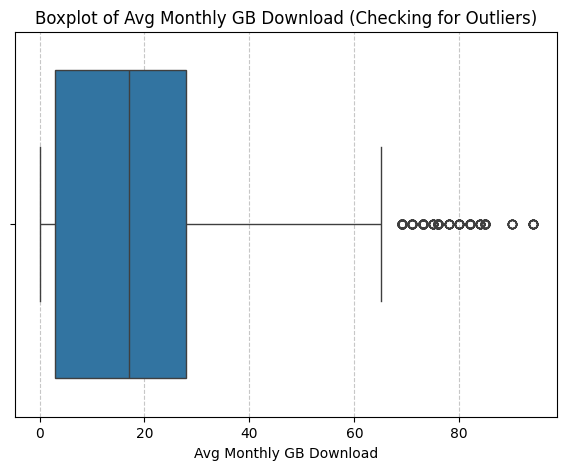

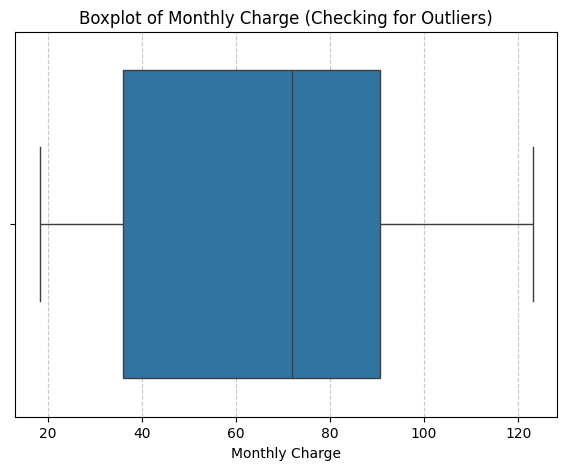

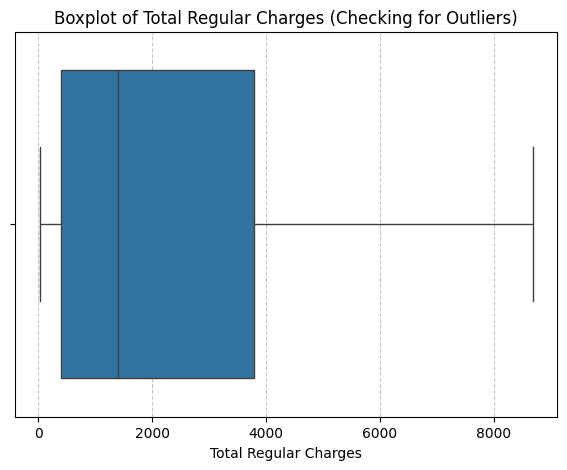

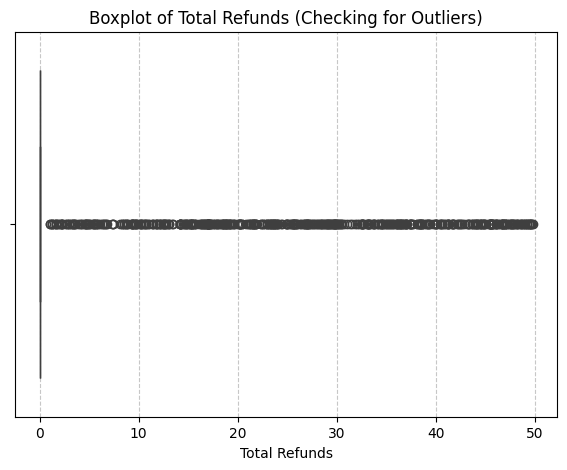

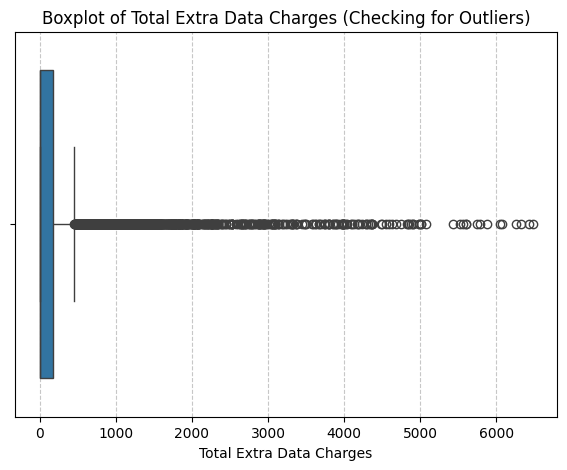

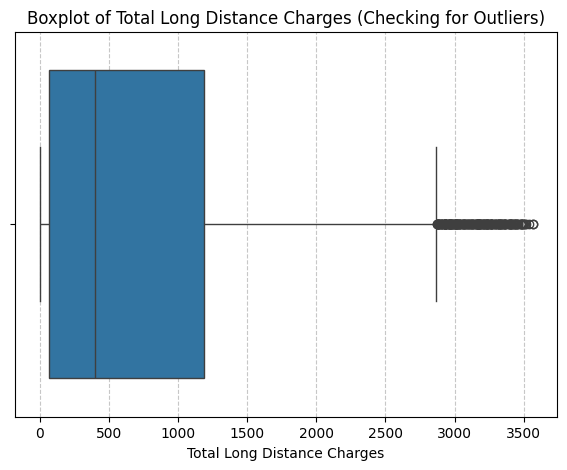

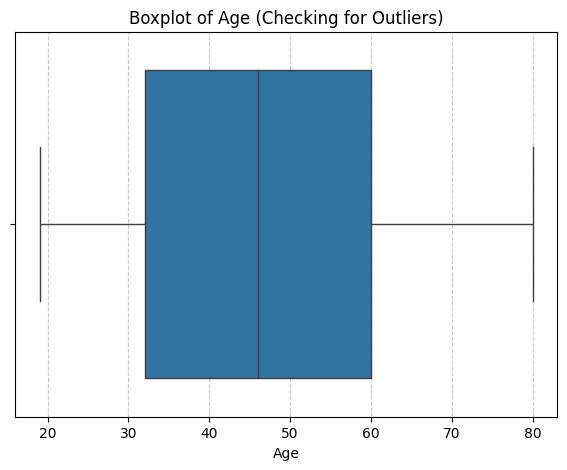

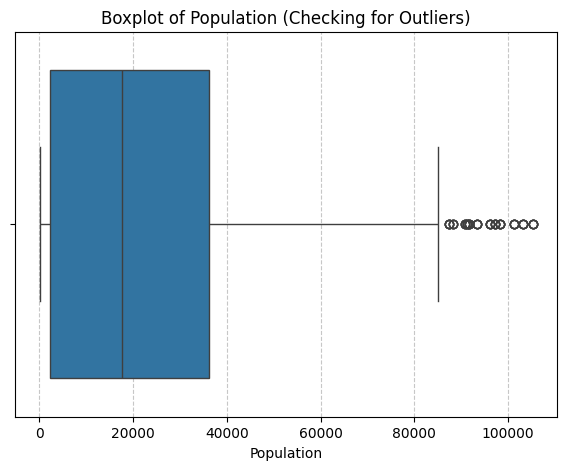

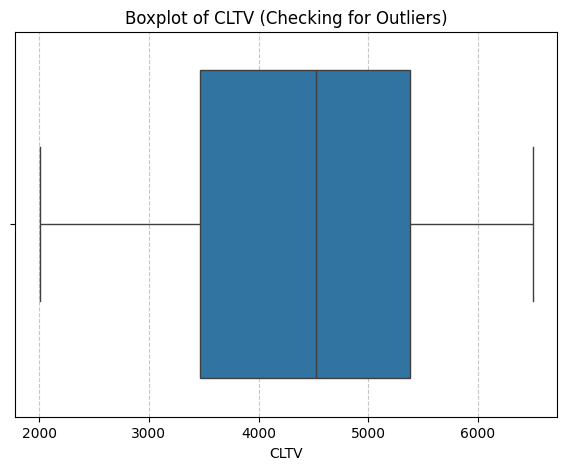

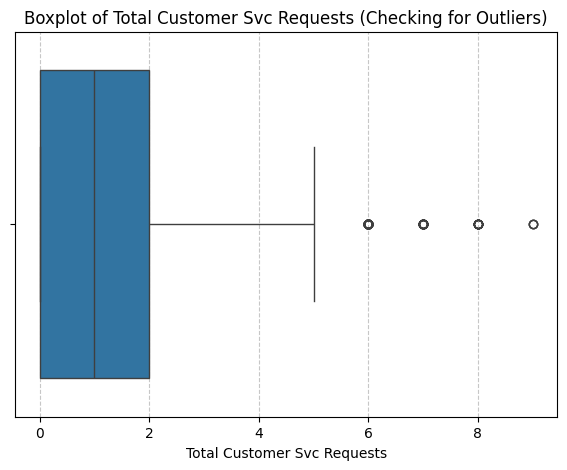

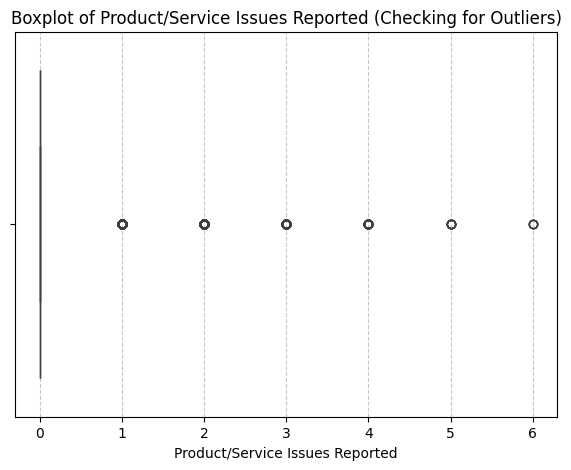

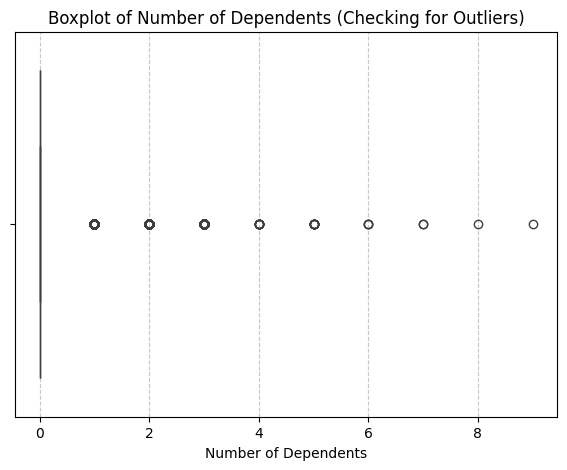

In [82]:
#checking for outliers in continuous variables

for feature in continuous_variables:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x=df_encoded[feature])
    plt.title(f"Boxplot of {feature} (Checking for Outliers)")
    plt.xlabel(feature)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


In [141]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.inspection import permutation_importance
import shap

In [110]:
'''
Our continuous features follow a non-gaussian distribution and many of them have notable outliers.
Standardscaler is not appropriate given the distribution, min max scaler will be affected by outliers and robust scaler will create negative values
Box Cox transformation is ruled out since we have 0s as values (must be strictly positive)
Next best option - Yeo-Johnson
Ah fuck it - let just use min-max scaler so that we have comparable weights. Might be a little squished due to outliers but who cares
'''
pscaler = MinMaxScaler()

#Test train split followed by scaling - drop target before scaling - .7 train - .15 val - .15 test (meh)
# Stratified split to account for unbalanced dataset
X =  df_encoded.drop(columns=["Churn Value"])
y= df_encoded["Churn Value"]
X_train, X_tt,y_train, y_tt = train_test_split(X,y,test_size=0.4, random_state=69, stratify=y)
X_validation, X_test, y_validation, y_test = train_test_split(X_tt,y_tt,test_size=0.5, random_state=69, stratify=y_tt)
X_train[continuous_variables] = pscaler.fit_transform(X_train[continuous_variables])
X_validation[continuous_variables] = pscaler.transform(X_validation[continuous_variables])
X_test[continuous_variables] = pscaler.transform(X_test[continuous_variables])

In [93]:
print(continuous_variables)

['Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Regular Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Age', 'Population', 'CLTV', 'Total Customer Svc Requests', 'Product/Service Issues Reported', 'Number of Dependents']


In [112]:
print(X_test.shape,X_validation.shape,X_train.shape)
print(y_test.shape,y_validation.shape,y_train.shape)

(1409, 96) (1409, 96) (4225, 96)
(1409,) (1409,) (4225,)


In [111]:
X_train[continuous_variables].describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Population,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Number of Dependents
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
mean,0.178741,0.439387,0.460358,0.221191,0.447011,0.255373,0.038522,0.043375,0.209589,0.451182,0.209762,0.531130,0.147824,0.050493,0.052387
std,0.273165,0.343757,0.309196,0.220904,0.293826,0.256784,0.155672,0.105088,0.236901,0.273344,0.201938,0.262486,0.158512,0.117410,0.106940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.112676,0.186637,0.031915,0.161612,0.042586,0.000000,0.000000,0.019142,0.229508,0.020290,0.327402,0.000000,0.000000,0.000000
50%,0.000000,0.394366,0.459492,0.180851,0.501141,0.156198,0.000000,0.000000,0.112666,0.442623,0.161930,0.560053,0.111111,0.000000,0.000000
75%,0.272727,0.760563,0.730946,0.297872,0.691278,0.420808,0.000000,0.028254,0.335050,0.672131,0.343627,0.749333,0.222222,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
#Creating baseline logistic regression model'
logistic = LogisticRegression(random_state=69, max_iter=1000)
#Probably a better way to do this but we will incrementally train models to record training/validation accuracies
train_accuracies,val_accuracies = [],[]

#training for a different number of iterations so we call pull accuracies
for i in range(1, 100, 1):
    logistic.set_params(max_iter=i)
    logistic.fit(X_train, y_train)

    train_score = accuracy_score(y_train,logistic.predict(X_train))
    val_score = accuracy_score(y_validation,logistic.predict(X_validation))
    train_accuracies.append(train_score)#saving score for given #of iterations
    val_accuracies.append(val_score)

yv_pred = logistic.predict(X_validation)
accuracy = accuracy_score(y_validation, yv_pred)
roc_auc = roc_auc_score(y_validation,logistic.predict_proba(X_validation)[:, 1])



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [123]:
print(f"Validation Accuracy: {accuracy}\nValidation ROC AUC: {roc_auc}")
print(f"Validation ROC AUC: {roc_auc}")
print("\n\nClassification Report:\n", classification_report(y_validation, yv_pred))

Validation Accuracy: 0.9070262597586941
Validation ROC AUC: 0.9521790798005632
Validation ROC AUC: 0.9521790798005632


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      1035
           1       0.86      0.77      0.82       374

    accuracy                           0.91      1409
   macro avg       0.89      0.86      0.88      1409
weighted avg       0.91      0.91      0.91      1409



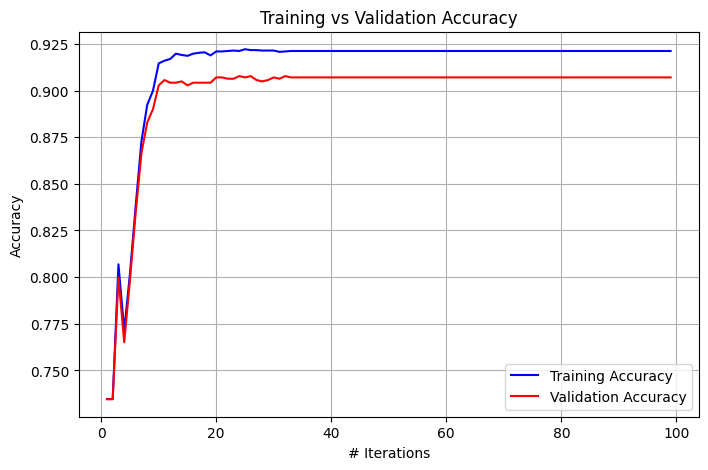

In [125]:

plt.figure(figsize=(8, 5))
plt.plot(range(1, 100, 1), train_accuracies, label="Training Accuracy", color="b")
plt.plot(range(1, 100, 1), val_accuracies, label="Validation Accuracy", color="r")
plt.xlabel("# Iterations")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()
#trapped in a minima around 30

In [135]:
'''
We can check weights, permutation importance and SHAP (Might be the easiest to explain)
'''

fweight_df = pd.DataFrame({"Feature": X_train.columns, "Weight": logistic.coef_[0]})
fweight_df["Abs_Weight"] = np.abs(fweight_df["Weight"])
fweight_df = fweight_df.sort_values(by="Abs_Weight", ascending=False)
print(fweight_df.drop(columns=["Abs_Weight"]).head(50)) #top 20 by weights
#Wow that is interesting

                            Feature    Weight
31      Total Customer Svc Requests  7.051384
1               Number of Referrals -5.145633
32  Product/Service Issues Reported  4.258059
17                   Monthly Charge  4.159905
36                Contract_Two Year -2.302347
2                  Tenure in Months -2.026812
34        Internet Type_Fiber Optic -1.419319
0                 Referred a Friend  1.394069
3                     Phone Service -1.277587
27                       Dependents -1.254312
35                Contract_One Year -1.204236
15                   Unlimited Data -1.011108
20         Total Extra Data Charges  0.881880
33                Internet Type_DSL -0.835342
71         County_Sacramento County  0.812619
65               County_Napa County  0.749495
62              County_Modoc County -0.746734
25                   Senior Citizen  0.695442
59           County_Mariposa County -0.686206
40             County_Amador County  0.621695
85             County_Solano Count

In [139]:
#next checking permutation importances
perm_importance = permutation_importance(logistic, X_validation, y_validation, n_repeats=1000, random_state=69) #I don't advise doing more than 500 repeats due to time
sorted_indices = np.argsort(perm_importance.importances_mean)[::-1]
for i in sorted_indices[:50]:#top 50
    print(f"{X_train.columns[i]}: {perm_importance.importances_mean[i]}")


Monthly Charge: 0.06126898509581264
Total Customer Svc Requests: 0.05195244854506743
Number of Referrals: 0.03449893541518807
Contract_Two Year: 0.02367139815471966
Referred a Friend: 0.01724059616749467
Internet Type_Fiber Optic: 0.014950319375443574
Unlimited Data: 0.014463449254790624
Tenure in Months: 0.014304471256210071
Product/Service Issues Reported: 0.012345635202271108
Internet Type_DSL: 0.01001561391057487
Contract_One Year: 0.009696238466997865
Dependents: 0.008562100780695525
Phone Service: 0.004466288147622425
Paperless Billing: 0.0025940383250532256
Payment Method_Mailed Check: 0.0023754435770049643
Streaming TV: 0.0020667139815471946
Streaming Music: 0.0016337828246983622
County_San Diego County: 0.0014520936834634438
Multiple Lines: 0.001448545067423698
Online Security: 0.001444286728176008
Married: 0.001387508871540098
Total Long Distance Charges: 0.0012718239886444274
Population: 0.0011291696238466943
Total Extra Data Charges: 0.0010425833924769293
Avg Monthly GB Dow

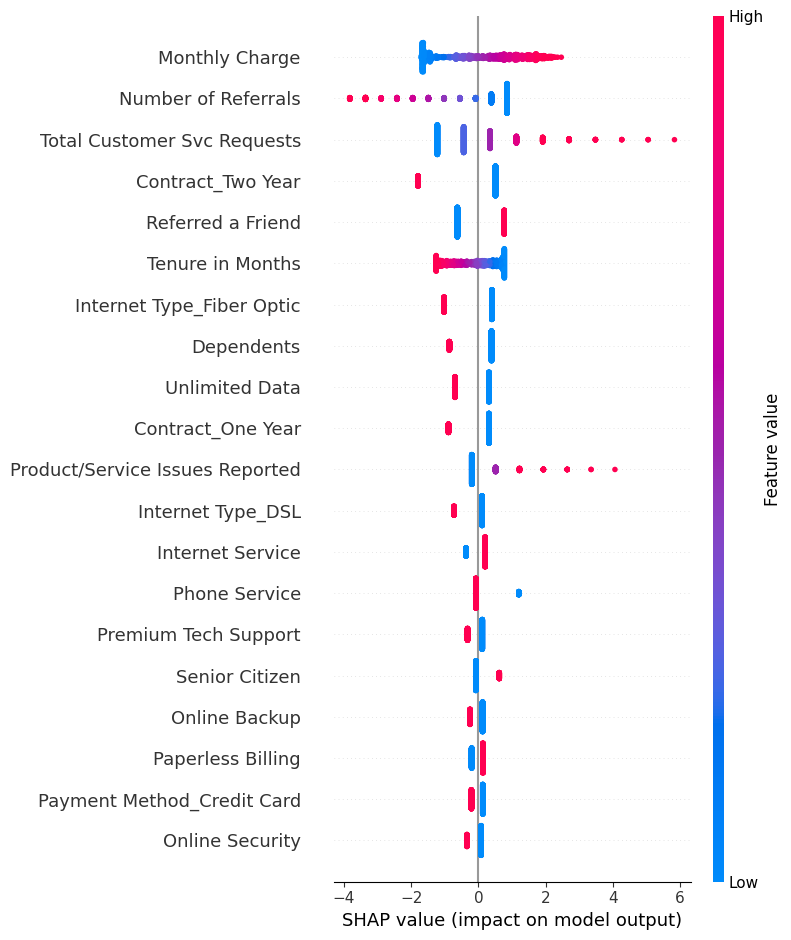

In [142]:
#SHAP (You can also do RFE but I will stop here because it feels like enough)
explainer = shap.Explainer(logistic, X_train)
shap_values = explainer(X_validation)
shap.summary_plot(shap_values, X_validation)


In [144]:
#Tuning - Grid Search followed by Bayesian tuning to optimize
from sklearn.model_selection import GridSearchCV
from itertools import product

In [208]:
grid = {
    'C': np.array([0.0001, 0.001, 0.01, 0.1, 1,5,10,100]), #just guessing numbers past the standard values,
    'penalty': np.array(['l1', 'l2', 'elasticnet', 'none']),
    'solver': np.array(['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag']),
    'l1_ratio': np.array([0.1, 0.3, 0.5, 0.7, 0.9])}
#Note: Not all solvers seem to work with all penalties

In [209]:
logistic= LogisticRegression(max_iter=100)#based on tests this should be sufficient
grid_search = GridSearchCV(logistic, grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)#5 fold due to dataset size (a guess really)
grid_search.fit(X_train, y_train)

print("Grid Search Best Results (Round 1 of HP tuning):", grid_search.best_params_)


Fitting 5 folds for each of 800 candidates, totalling 4000 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
2400 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_s

Grid Search Best Results (Round 1 of HP tuning): {'C': 1.0, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}


In [166]:
grid_search.best_estimator_

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [183]:
#'C': 1.0, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'
logr= LogisticRegression(C=1.0, l1_ratio=0.5, penalty='elasticnet', solver='saga', max_iter=1000)
logr.fit(X_train, y_train)
yv_pred = logr.predict(X_validation)
accuracy = accuracy_score(y_validation, yv_pred)
roc_auc = roc_auc_score(y_validation,logr.predict_proba(X_validation)[:, 1])

In [184]:
print(f"Validation Accuracy: {accuracy}\nValidation ROC AUC: {roc_auc}")
print(f"Validation ROC AUC: {roc_auc}")
print("\n\nClassification Report:\n", classification_report(y_validation, yv_pred))

Validation Accuracy: 0.9070262597586941
Validation ROC AUC: 0.9525795034746442
Validation ROC AUC: 0.9525795034746442


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      1035
           1       0.86      0.77      0.82       374

    accuracy                           0.91      1409
   macro avg       0.89      0.86      0.88      1409
weighted avg       0.91      0.91      0.91      1409



In [203]:
#unchanged from before, so we re-run grid search but using class weighted loss penalties
logistic= LogisticRegression(max_iter=100,class_weight="balanced")
grid_search = GridSearchCV(logistic, grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)#5 fold due to dataset size
grid_search.fit(X_train, y_train)
#5 vs 10 fold cv makes no difference
print("Grid Search Best Results w/class weighted penalties (Round 1 of HP tuning):", grid_search.best_params_)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
4800 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_s

Grid Search Best Results w/class weighted penalties (Round 1 of HP tuning): {'C': 1.0, 'l1_ratio': 0.3, 'penalty': 'elasticnet', 'solver': 'saga'}


In [188]:
#{'C': 1.0, 'l1_ratio': 0.3, 'penalty': 'elasticnet', 'solver': 'saga'}
logr2= LogisticRegression(C=1.0, l1_ratio=0.3, penalty='elasticnet', solver='saga', max_iter=100,class_weight="balanced")
logr2.fit(X_train, y_train)
yv_pred = logr2.predict(X_validation)
accuracy = accuracy_score(y_validation, yv_pred)
roc_auc = roc_auc_score(y_validation,logr2.predict_proba(X_validation)[:, 1])

In [189]:
print(f"Validation Accuracy: {accuracy}\nValidation ROC AUC: {roc_auc}")
print(f"Validation ROC AUC: {roc_auc}")
print("\n\nClassification Report:\n", classification_report(y_validation, yv_pred))

Validation Accuracy: 0.8843151171043293
Validation ROC AUC: 0.9522384975070397
Validation ROC AUC: 0.9522384975070397


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      1035
           1       0.74      0.87      0.80       374

    accuracy                           0.88      1409
   macro avg       0.84      0.88      0.86      1409
weighted avg       0.89      0.88      0.89      1409



In [194]:
#Perform bayesian tuning based on past results:
import optuna
#starting point - grid results
best_params = {'C': 1.0, 'l1_ratio': 0.3, 'penalty': 'elasticnet', 'solver': 'saga'}

#Following optuna sample
def objective(trial):
    C = trial.suggest_loguniform("C", 0.01, 10.0)
    l1_ratio = trial.suggest_uniform("l1_ratio", 0.1, 0.5)
    penalty ="elasticnet"
    solver= "saga"
    logy = LogisticRegression(C=C, l1_ratio=l1_ratio, penalty=penalty, solver=solver, max_iter=500, class_weight='balanced')
    score = cross_val_score(logy, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    return score.mean()

#Bayesian optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, n_jobs=-1)

# Print best parameters
print("Best parameters from Optuna:", study.best_params)

# Train final model using best Optuna parameters
best_optuna_params = study.best_params
final_model = LogisticRegression(
    C=best_optuna_params["C"],
    l1_ratio=best_optuna_params["l1_ratio"],
    penalty="elasticnet",
    solver="saga",
    max_iter=100,
    class_weight='balanced'
)

final_model.fit(X_train, y_train)



[I 2025-03-10 07:10:07,107] A new study created in memory with name: no-name-cfa06d13-4e2c-41c4-9199-596e43402c5b
<ipython-input-194-64b5ddf06881>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 0.01, 10.0)
<ipython-input-194-64b5ddf06881>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  l1_ratio = trial.suggest_uniform("l1_ratio", 0.1, 0.5)
[I 2025-03-10 07:10:27,398] Trial 1 finished with value: 0.8818934911242604 and parameters: {'C': 0.1946638986397541, 'l1_ratio': 0.17302087298573032}. Best is trial 1 with value: 0.8818934911242604.
<ipython-input-194-64b5ddf06881>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

Best parameters from Optuna: {'C': 0.8116650832411205, 'l1_ratio': 0.23051266707188162}


LogisticRegression(C=0.8116650832411205, class_weight='balanced',
                   l1_ratio=0.23051266707188162, penalty='elasticnet',
                   solver='saga')

In [244]:
#(C=0.8116650832411205, class_weight='balanced',l1_ratio=0.23051266707188162, penalty='elasticnet',solver='saga')
final_model=LogisticRegression(class_weight={1:1.4,0:1},C=0.8116650832411205,l1_ratio=0.23051266707188162, penalty='elasticnet',solver='saga')
final_model.fit(X_train, y_train)
yv_pred = final_model.predict(X_validation)
accuracy = accuracy_score(y_validation, yv_pred)
roc_auc = roc_auc_score(y_validation,final_model.predict_proba(X_validation)[:, 1])

In [245]:
print(f"Validation Accuracy: {accuracy}\nValidation ROC AUC: {roc_auc}")
print(f"Validation ROC AUC: {roc_auc}")
print("\n\nClassification Report:\n", classification_report(y_validation, yv_pred))

Validation Accuracy: 0.9048970901348474
Validation ROC AUC: 0.9523521661629079
Validation ROC AUC: 0.9523521661629079


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      1035
           1       0.84      0.80      0.82       374

    accuracy                           0.90      1409
   macro avg       0.88      0.87      0.88      1409
weighted avg       0.90      0.90      0.90      1409

